<a href="https://colab.research.google.com/github/Shahbaz894/meachine-learning-/blob/main/Bias_Variance_Trade_Off(part_2)_by_shahbaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np

outcome = []
for i in range(1000000):
  outcome.append(random.randint(1,6))

np.array(outcome).mean()

3.499043

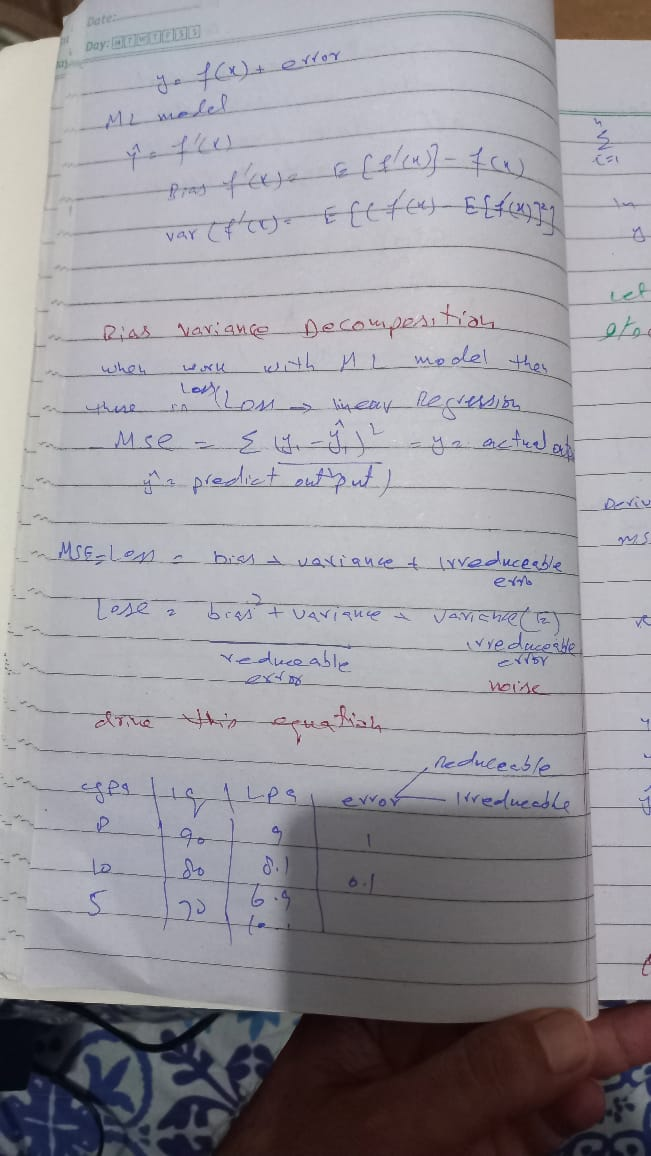
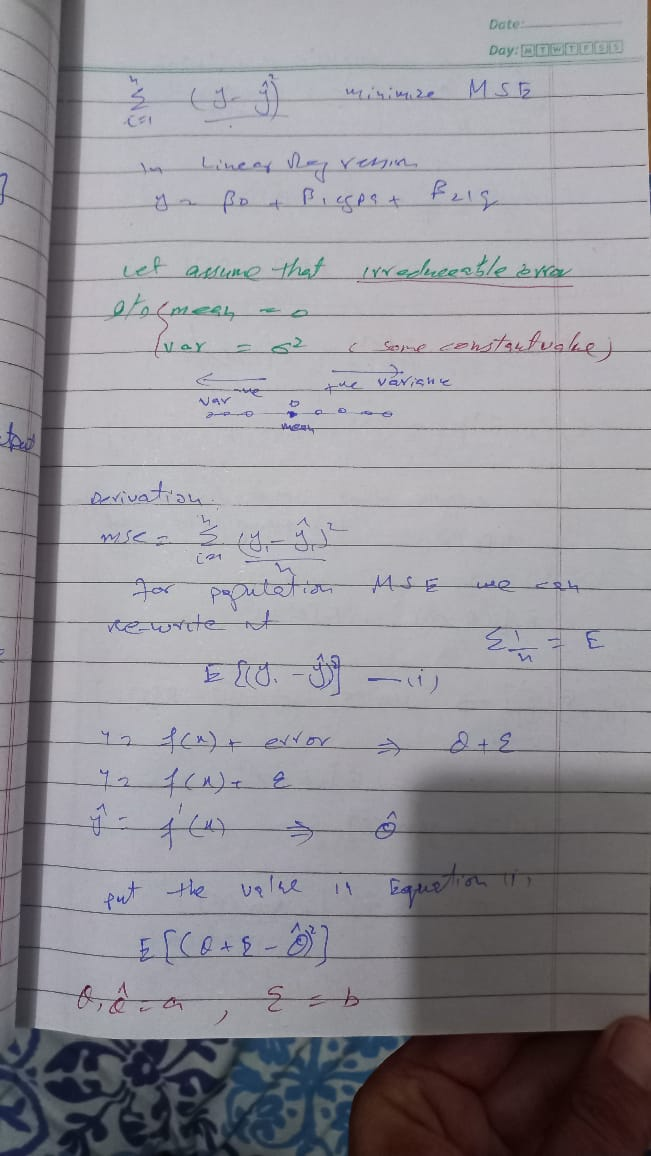
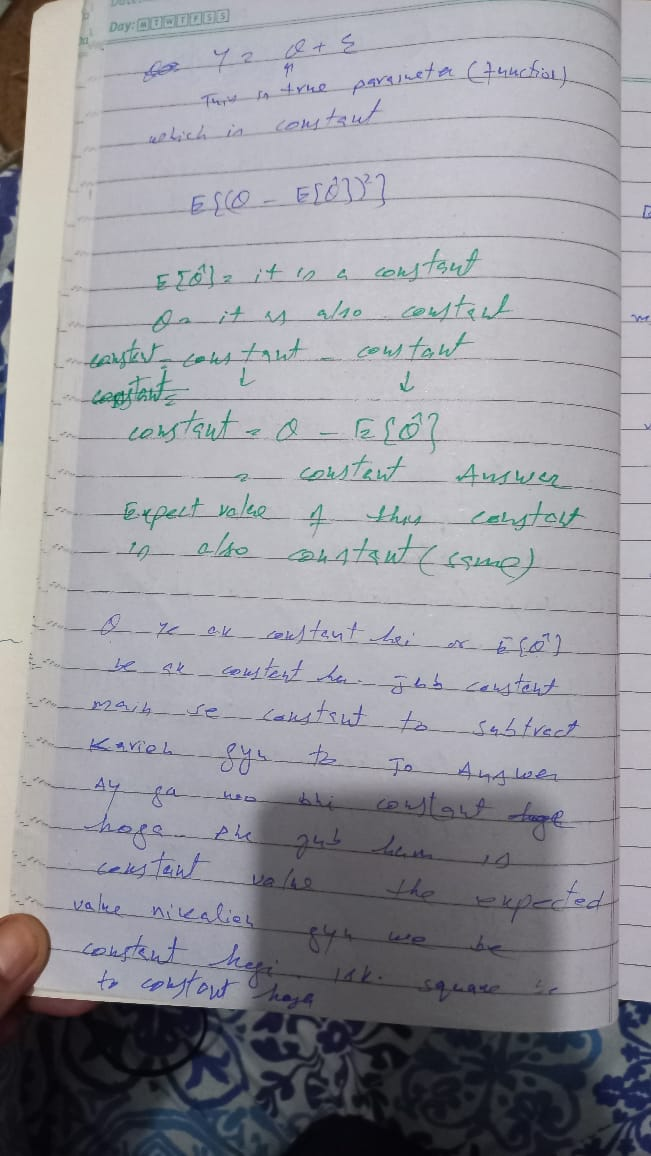

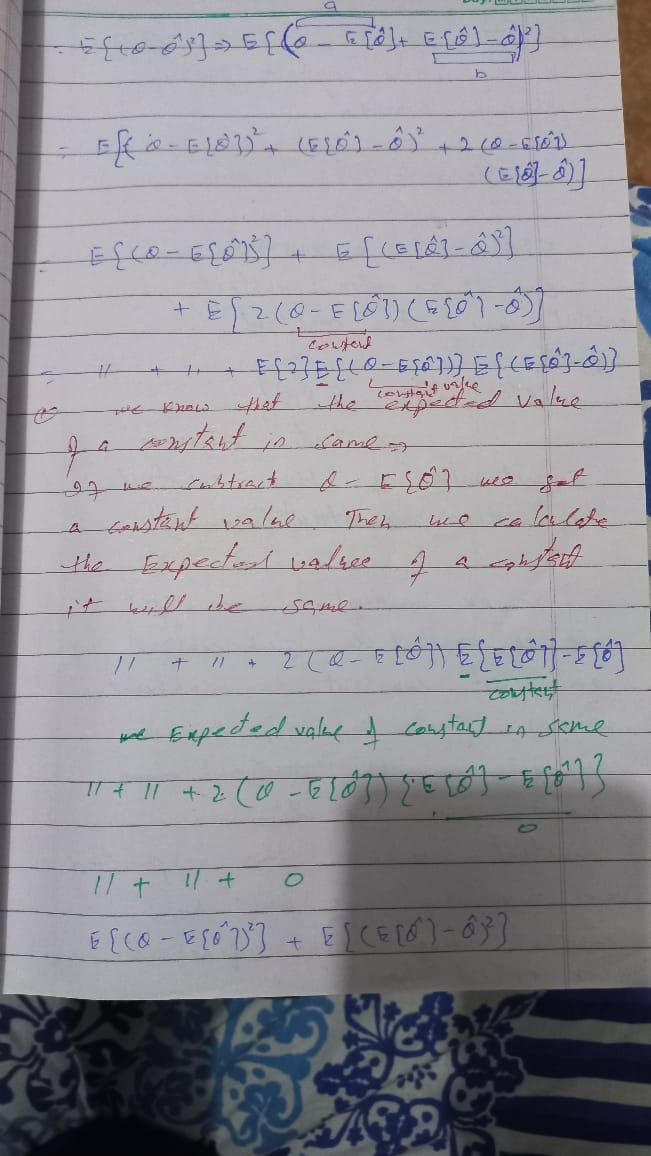
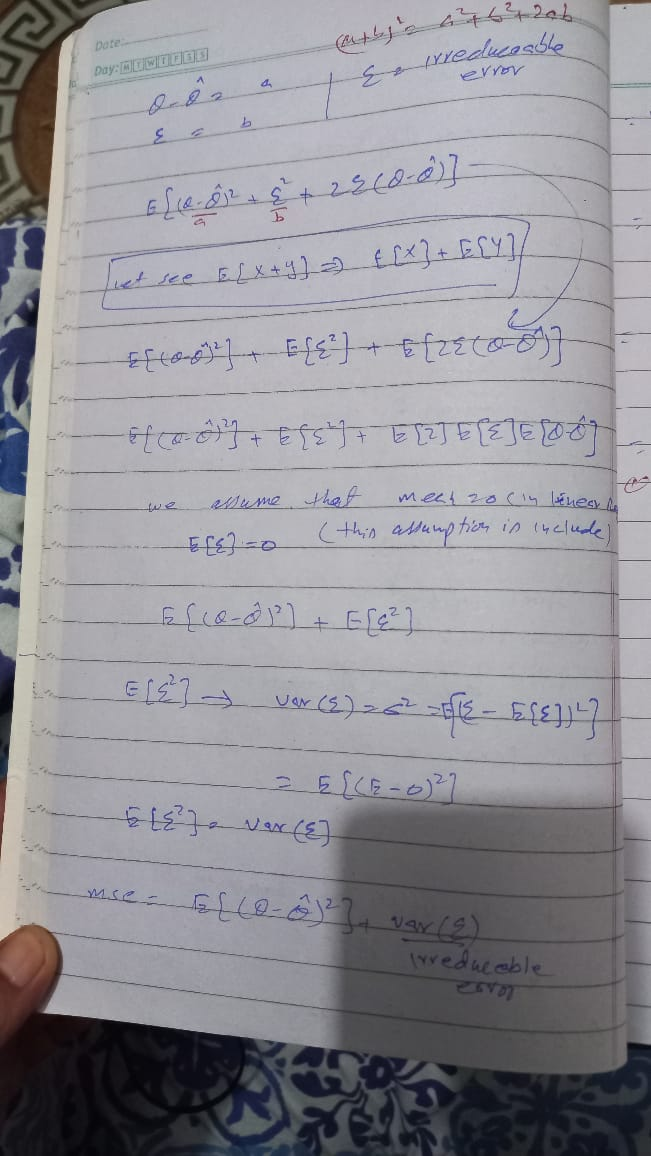
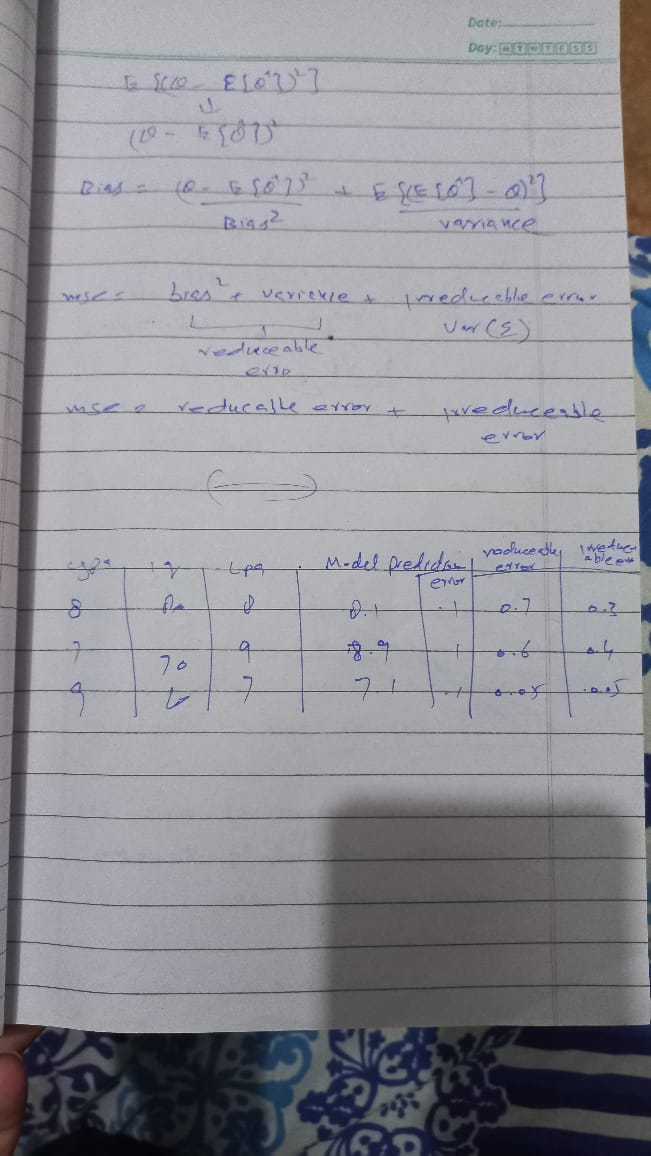
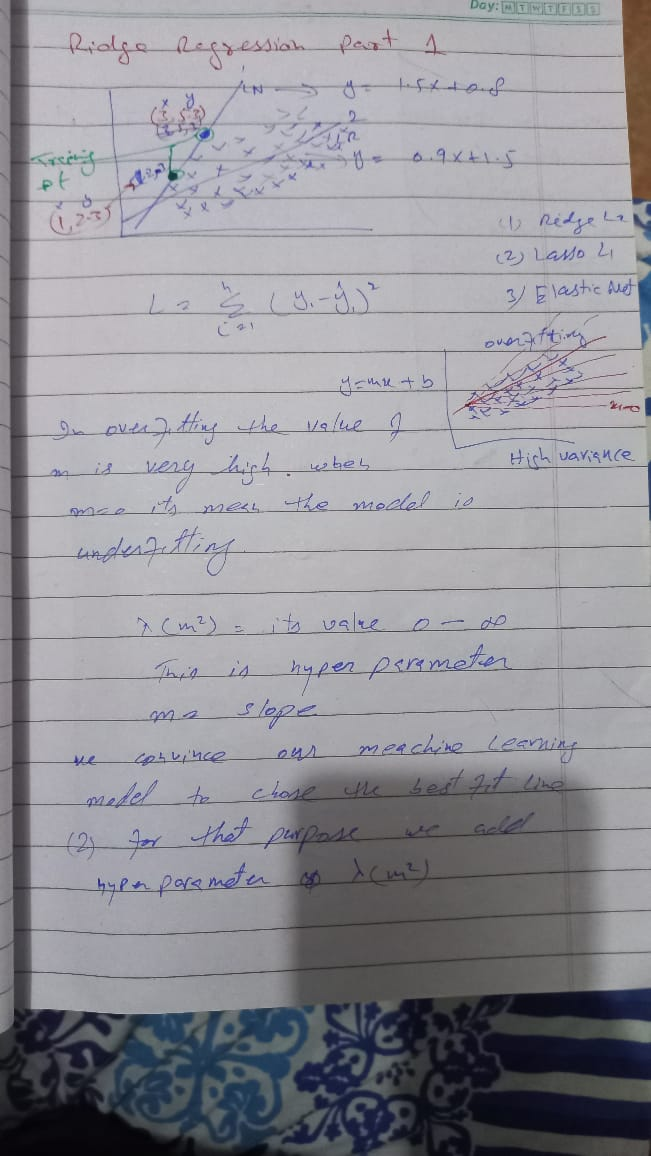
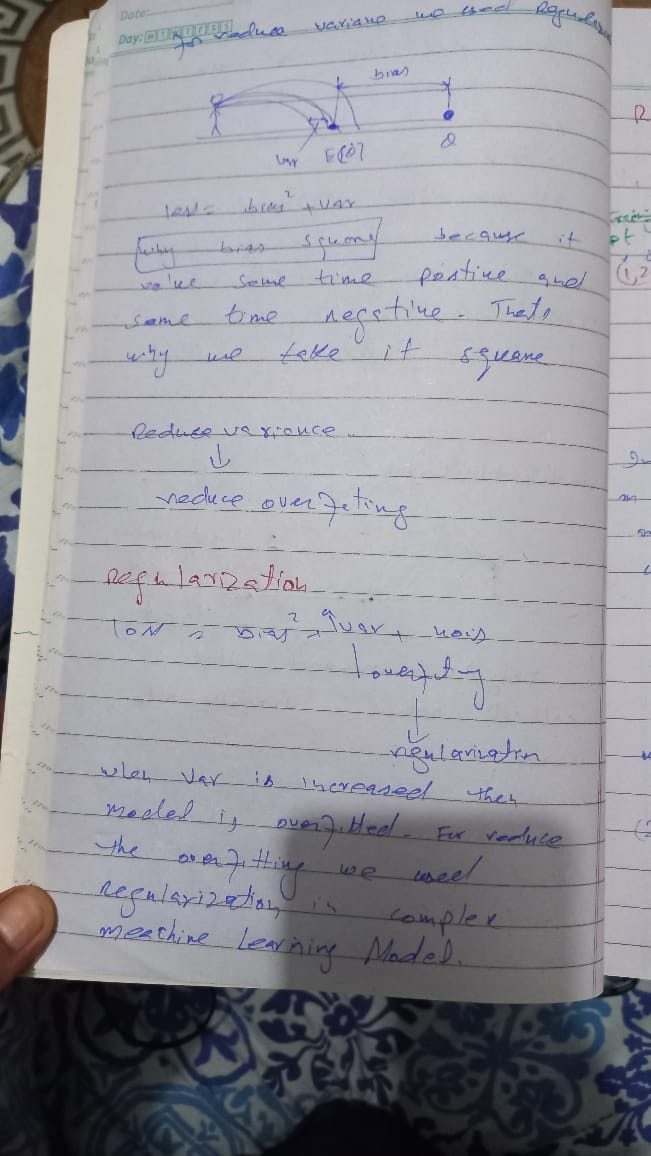

In [ ]:
import random
import numpy as np

outcome = []
for i in range(1000000):
  outcome.append(random.randint(1,6))

np.array(outcome).mean()

3.497281

What exactly are Bias and Variance Mathematically?
**Bias**

In the context of machine learning and statistics, bias refers to the systematic
error that a model introduces because it cannot capture the true relationship in
the data. It represents the difference between the expected prediction of our
model and the correct value which we are trying to predict. More bias leads to
underfitting, where the model does not fit the training data well.

**variance**

In the context of machine learning and statistics, variance refers to the amount by
which the prediction of our model will change if we used a different training data
set. In other words, it measures how much the predictions for a given point vary
between different realizations of the model.

The decomposition of the loss into bias and variance helps us understand learning algorithms, as these concepts are correlated to underfitting and overfitting.

To use the more formal terms for bias and variance, assume we have a point estimator θ^
 of some parameter or function θ
. Then, the bias is commonly defined as the difference between the expected value of the estimator and the parameter that we want to estimate:

Bias=E[θ^]−θ.
If the bias is larger than zero, we also say that the estimator is positively biased, if the bias is smaller than zero, the estimator is negatively biased, and if the bias is exactly zero, the estimator is unbiased. Similarly, we define the variance as the difference between the expected value of the squared estimator minus the squared expectation of the estimator:

Var(θ^)=E[θ^2]−(E[θ^])2.
Note that in the context of this lecture, it will be more convenient to write the variance in its alternative form:

Var(θ^)=E[(E[θ^]−θ^)2].
To illustrate the concept further in context of machine learning ...

Suppose there is an unknown target function or "true function" to which we do want to approximate. Now, suppose we have different training sets drawn from an unknown distribution defined as "true function + noise." The following plot shows different linear regression models, each fit to a different training set. None of these hypotheses approximate the true function well, except at two points (around x=-10 and x=6). Here, we can say that the bias is large because the difference between the true value and the predicted value, on average (here, average means "expectation of the training sets" not "expectation over examples in the training set"), is large:



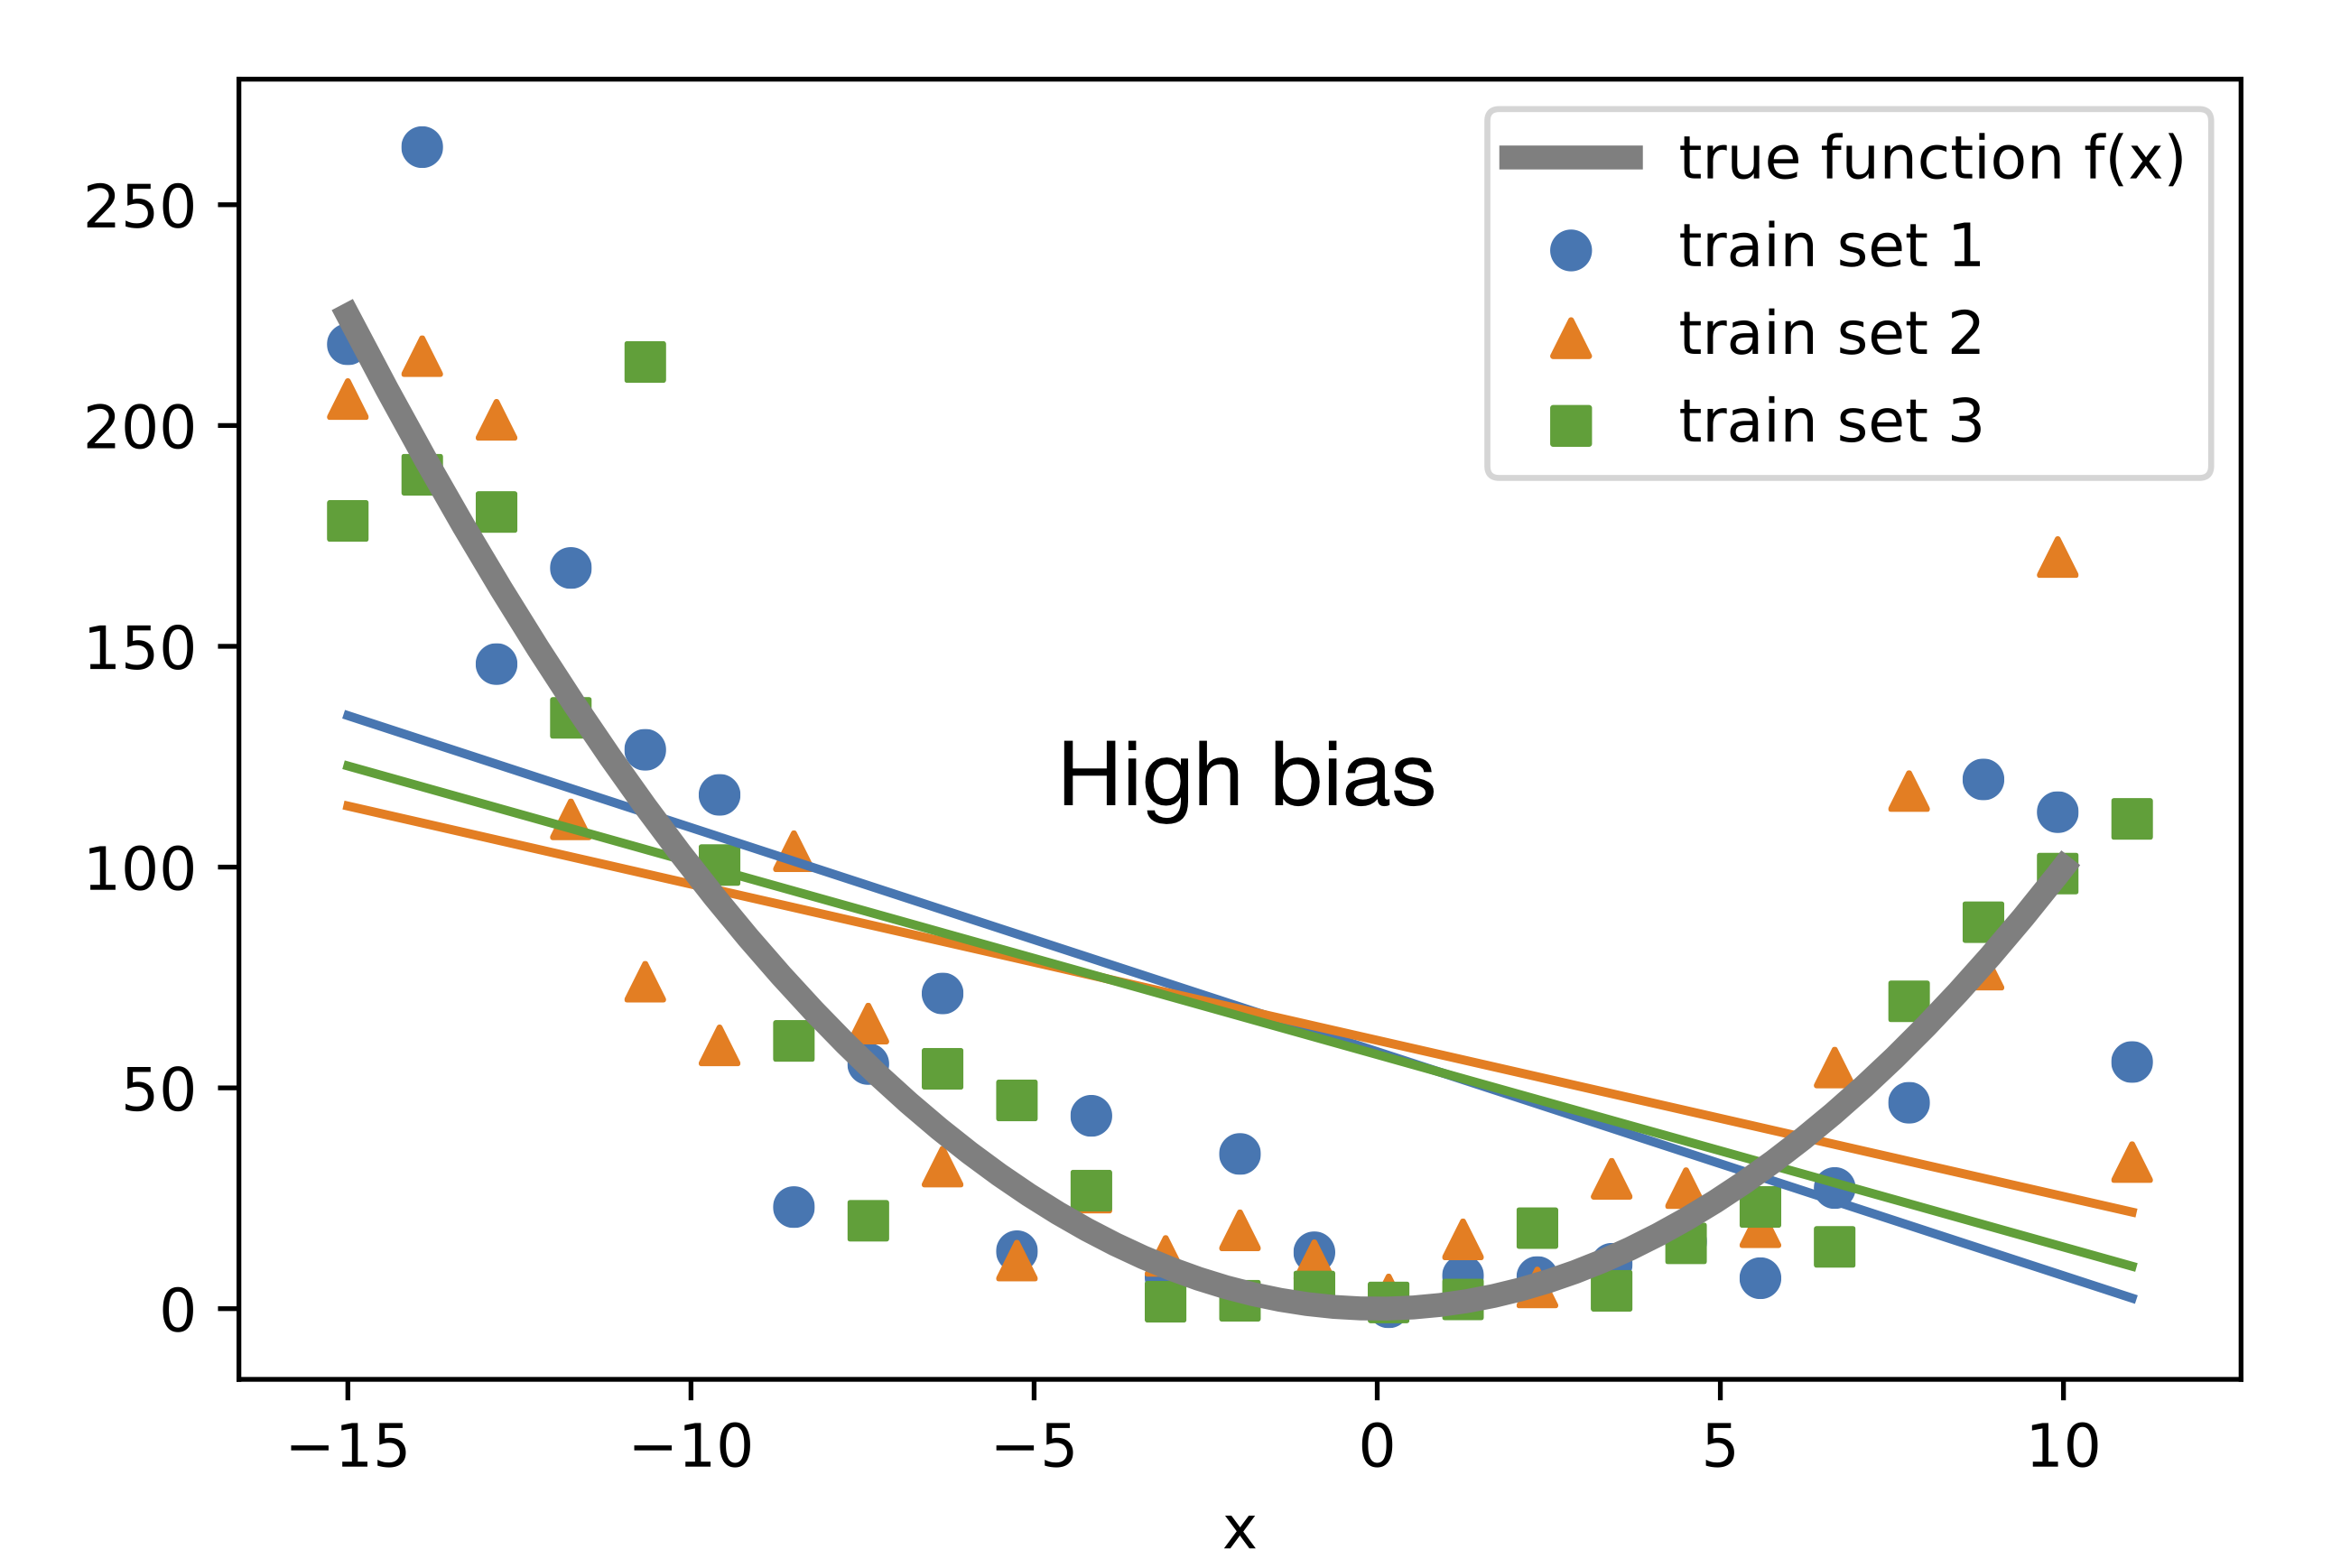



The next plot shows different unpruned decision tree models, each fit to a different training set. Note that these hypotheses fit the training data very closely. However, if we would consider the expectation over training sets, the average hypothesis would fit the true function perfectly (given that the noise is unbiased and has an expected value of 0). As we can see, the variance is very large, since on average, a prediction differs a lot from the expectation value of the prediction:

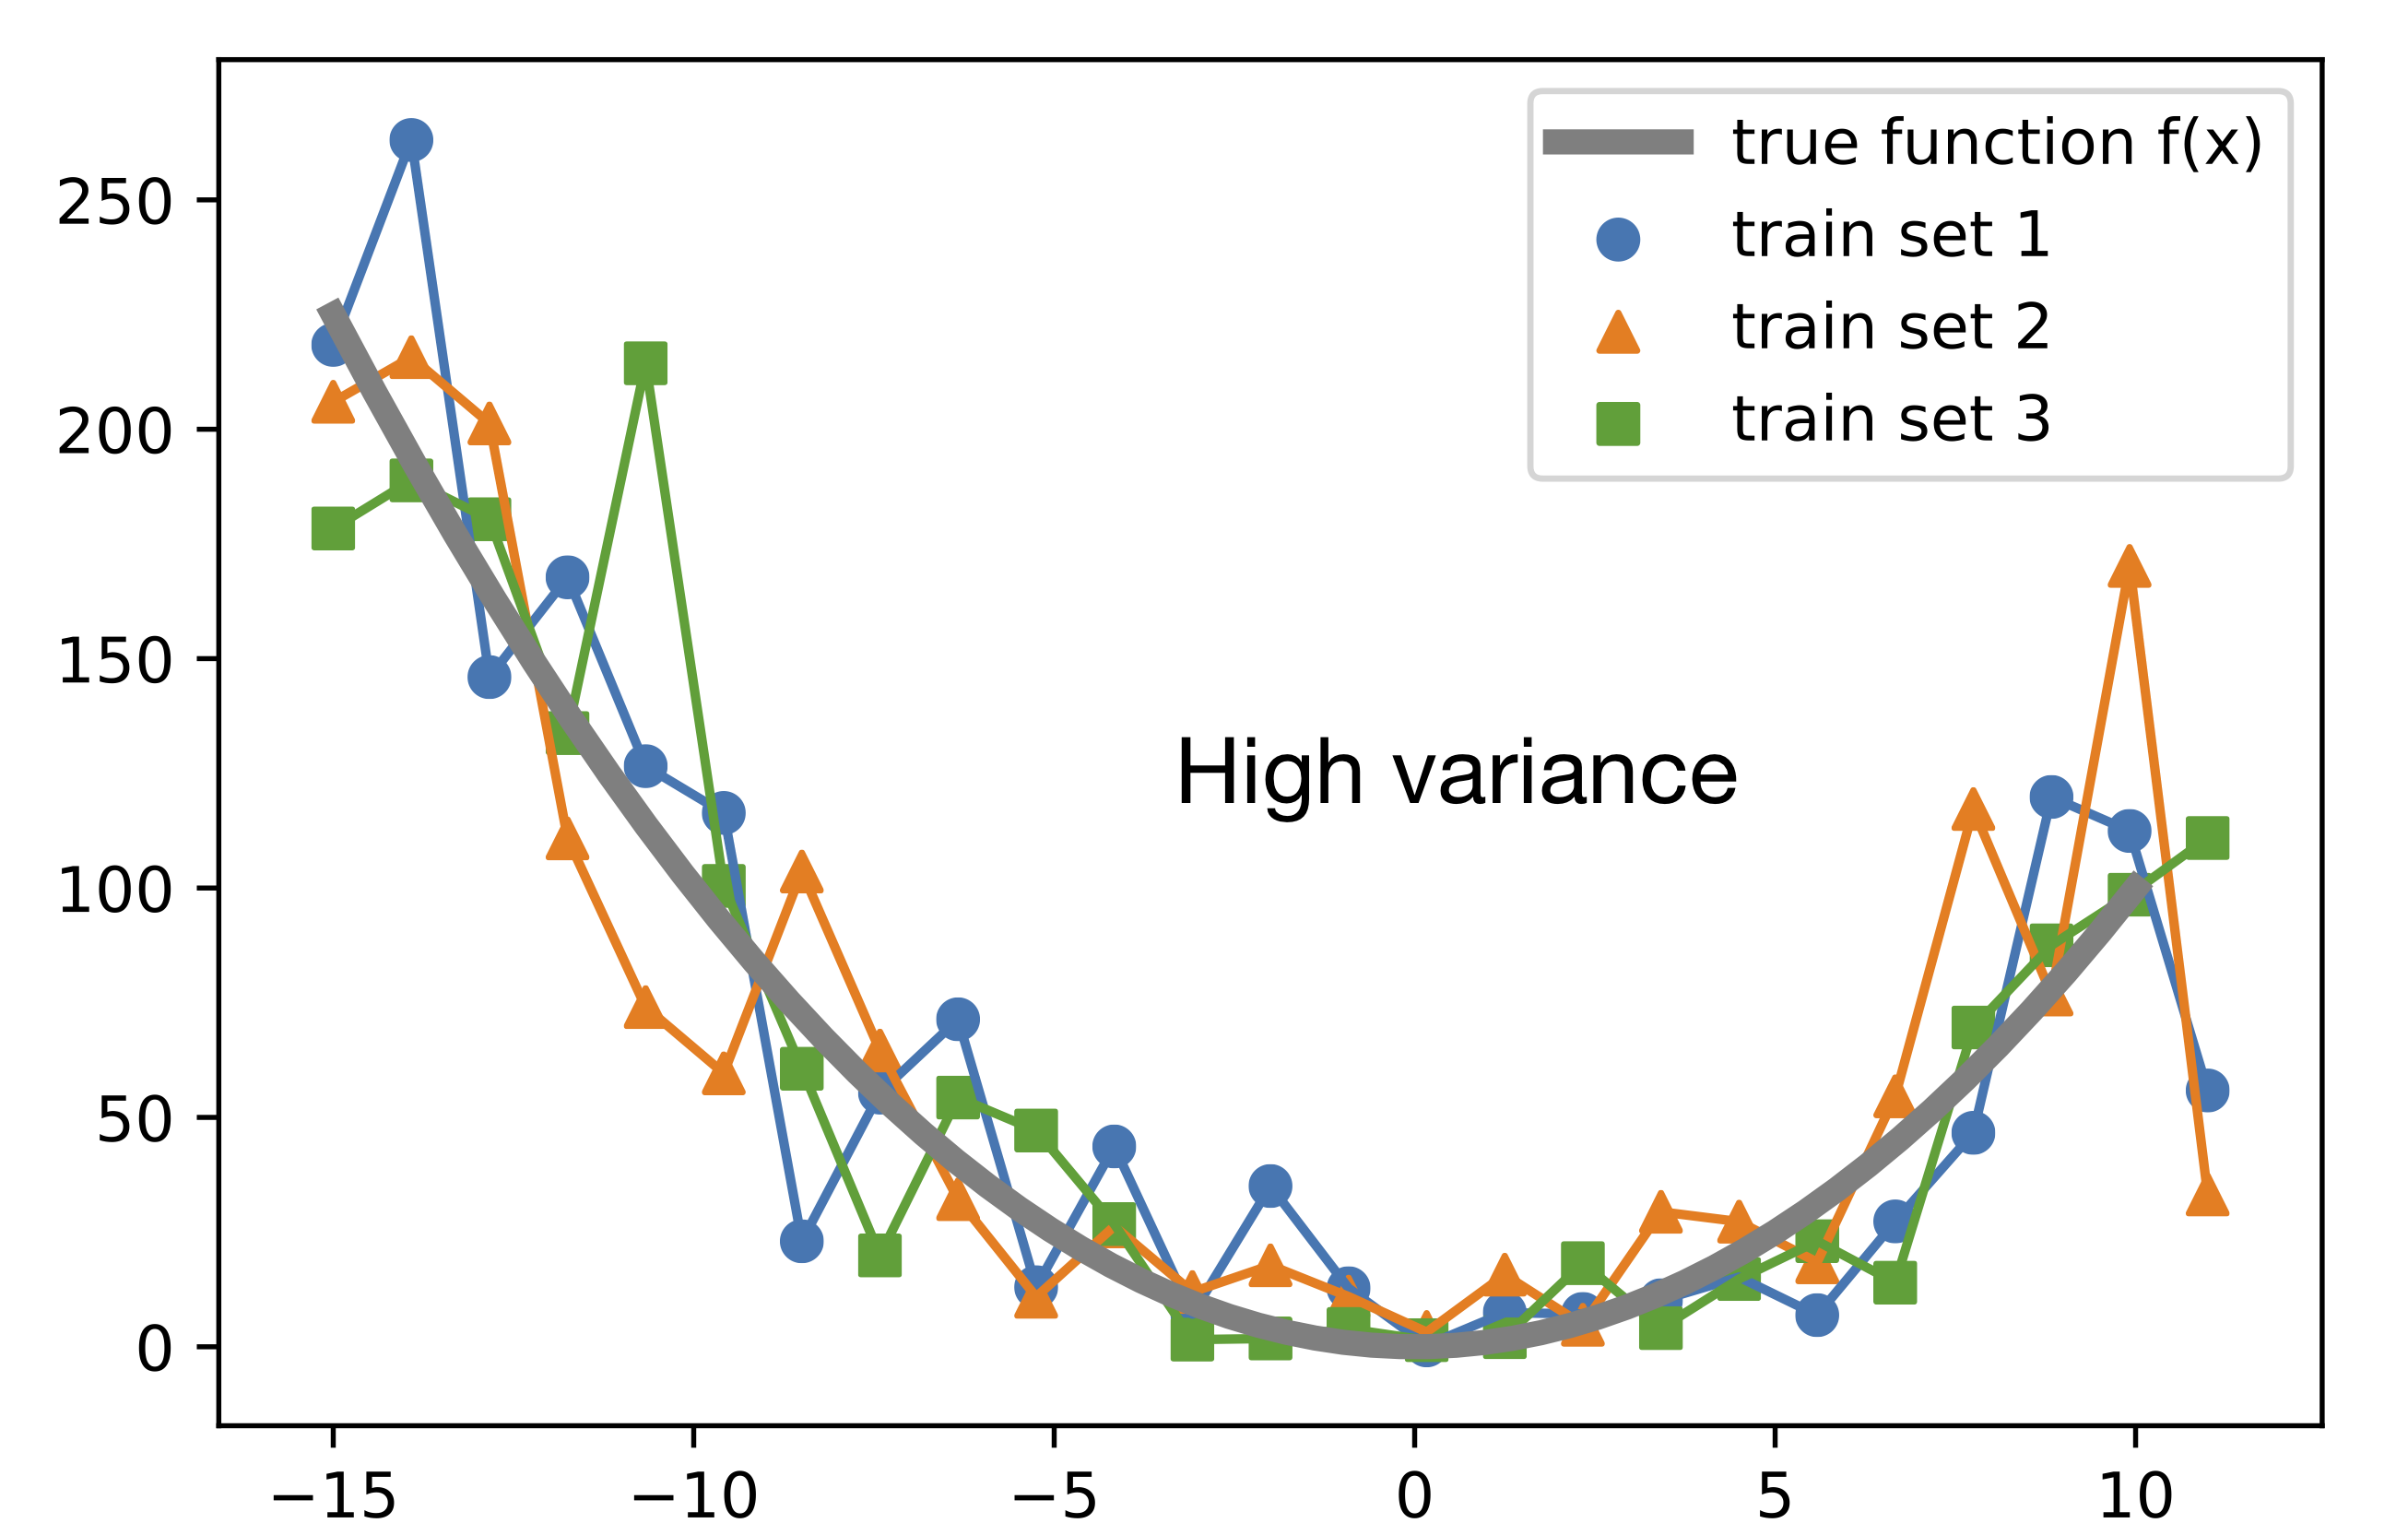

# Bias-Variance Decomposition of the Squared Loss
We can decompose a loss function such as the squared loss into three terms, a variance, bias, and a noise term (and the same is true for the decomposition of the 0-1 loss later). However, for simplicity, we will ignore the noise term.

Before we introduce the bias-variance decomposition of the 0-1 loss for classification, let us start with the decomposition of the squared loss as an easy warm-up exercise to get familiar with the overall concept.

The previous section already listed the common formal definitions of bias and variance, however, let us define them again for convenience:

Bias(θ^)=E[θ^]−θ,Var(θ^)=E[(E[θ^]−θ^)2].
Recall that in the context of these machine learning lecture (notes), we defined

the true or target function as y=f(x)
,
the predicted target value as y^=f^(x)=h(x)
,
and the squared loss as S=(y−y^)2
. (I use S
 here because it will be easier to tell it apart from the E
, which we use for the expectation in this lecture.)
Note that unless noted otherwise, the expectation is over training sets!

To get started with the squared error loss decomposition into bias and variance, let use do some algebraic manipulation, i.e., adding and subtracting the expected value of y^
 and then expanding the expression using the quadratic formula (a+b)2=a2+b2+2ab)
:

S=(y−y^)2(y−y^)2=(y−E[y^]+E[y^]−y^)2=(y−E[y^])2+(E[y^]−y)2+2(y−E[y^])(E[y^]−y^).
Next, we just use the expectation on both sides, and we are already done:

E[S]E[(y−y^)2]=E[(y−y^)2]=(y−E[y^])2+E[(E[y^]−y^)2]=[Bias]2+Variance.
You may wonder what happened to the "2ab
" term (2(y−E[y^])(E[y^]−y^)
) when we used the expectation. It turns that it evaluates to zero and hence vanishes from the equation, which can be shown as follows:

E[2(y−E[y^])(E[y^]−y^)]=2E[(y−E[y^])(E[y^]−y^)]=2(y−E[y^])E[(E[y^]−y^)]=2(y−E[y^])(E[E[y^]]−E[y^])=2(y−E[y^])(E[y^]−E[y^])=0.

So, this is the canonical decomposition of the squared error loss into bias and variance. The next section will discuss some approaches that have been made to decompose the 0-1 loss that we commonly use for classification accuracy or error.

The following figure is a sketch of variance and bias in relation to the training error and generalization error -- how high variance related to overfitting, and how large bias relates to underfitting:




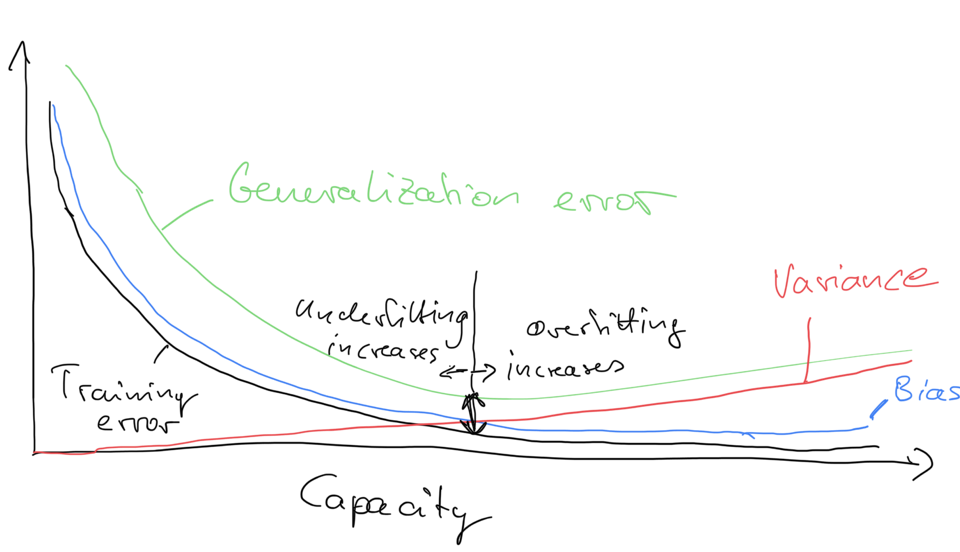

# Bias-Variance Decomposition of the 0-1 Loss

Note that decomposing the 0-1 loss into bias and variance components is not as straight-forward as for the squared error loss. To quote Pedro Domingos, a well-known machine learning researcher and professor at University of Washington:

"several authors have proposed bias-variance decompositions related to zero-one loss (Kong & Dietterich, 1995; Breiman, 1996b; Kohavi & Wolpert, 1996; Tibshirani, 1996; Friedman, 1997). However, each of these decompositions has significant shortcomings.". [1]

In fact, the paper this quote was taken from may offer the most intuitive and general formulation at this point. However, we will first, for simplicity, go over Kong & Dietterich formulation [2] of the 0-1 loss decomposition, which is the same as Domingos's but excluding the noise term (for simplicity).

The table below summarizes the relevant terms we used for the squared loss in relation to the 0-1 loss. Recall that the 0-1 loss, L
, is 0 if a class label is predicted correctly, and one otherwise. The main prediction for the squared error loss is simply the average over the predictions E[y^]
 (the expectation is over training sets), for the 0-1 loss Kong & Dietterich and Domingos defined it as the mode. I.e., if a model predicts the label one more than 50% of the time (considering all possible training sets), then the main prediction is 1, and 0 otherwise.


-	                     Squared Loss      	          0-1 Loss
Single loss	          (y−y^)2                         L(y,y^)
Expected loss       	E[(y−y^)2]                     E[L(y,y^)]
Main                  prediction                      E[y^]
mean                  (average)                      	mode
Bias2                 (y−E[y^])2                     L(y,E[y^])
Variance	            E[(E[y^]−y^)2]                E[L(y^,E[y^])]


Hence, as result from using the mode to define the main prediction of the 0-1 loss, the bias is 1 if the main prediction does not agree with the true label y
, and 0 otherwise:

Bias={1 if y≠E[y^],0 otherwise.
The variance of the 0-1 loss is defined as the probability that the predicted label does not match the main prediction:

Variance=P(y^≠E[y^]).
Next, let us take a look at what happens to the loss if the bias is 0. Given the general definition of the loss, loss = bias + variance, if the bias is 0, then we define the loss as the variance:

Loss=0+Variance=Loss=P(y^≠y)=Variance=P(y^≠E[y^]).
In other words, if a model has zero bias, it's loss is entirely defined by the variance, which is intuitive if we think of variance in the context of being proportional overfitting.

The more surprising scenario is if the bias is equal to 1. If the bias is equal to 1, as explained by Pedro Domingos, the increasing the variance can decrease the loss, which is an interesting observation. This can be seen by first rewriting the 0-1 loss function as

Loss=P(y^≠y)=1−P(y^=y).
(Note that we have not done anything new, yet.) Now, if we look at the previous equation of the bias, if the bias is 1, we have y≠E[y^]
. If y
 is not equal to the main prediction, but y
 is also is equal to y^
, then y^
 must be equal to the main prediction. Using the "inverse" ("1 minus"), we can then write the loss as

Loss=P(y^≠y)=1−P(y^=y)=1−P(y^≠E[y^]).
Since the bias is 1, the loss is hence defined as "loss = bias - variance" if the bias is 1 (or "loss = 1 - variance"). This might be quite unintuitive at first, but the explanations Kong, Dietterich, and Domingos offer was that if a model has a very high bias such that it main prediction is always wrong, increasing the variance can be beneficial, since increasing the variance would push the decision boundary, which might lead to some correct predictions just by chance then. In other words, for scenarios with high bias, increasing the variance can improve (decrease) the loss!

In [ ]:
pip install mlxtend

In [ ]:
pip install -U mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split


X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

In [ ]:
lr = LinearRegression()

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        lr, X_train, y_train, X_test, y_test,
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

TypeError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    lr, X_train, y_train, X_test, y_test,
    loss='mse',
    random_seed=123,
    num_rounds=200)

print("Average expected loss: ", avg_expected_loss)
print("Average bias: ", avg_bias)
print("Average variance: ", avg_var)

TypeError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_analysis
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

avg_expected_loss, avg_bias, avg_var = bias_variance_analysis(
    lr, X_train, y_train, X_test, y_test,
    loss='mse',
    random_seed=123,
    num_rounds=200)

print("Average expected loss: ", avg_expected_loss)
print("Average bias: ", avg_bias)
print("Average variance: ", avg_var)

ImportError: ignored